<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [141]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [142]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [143]:
!pip install graphviz
!pip install pydotplus
!pip install mlxtend 
!pip install  watermark

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [144]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-05-19 17:13:41--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: 'loan_train.csv'

     0K .......... .......... ..                              100% 2.50M=0.009s

2022-05-19 17:13:42 (2.50 MB/s) - 'loan_train.csv' saved [23101/23101]



### Load Data From CSV File


In [145]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [146]:
df.shape

(346, 10)

### Convert to date time object


In [147]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [148]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [149]:
# notice: installing seaborn might takes a few minutes
# !conda install -c anaconda seaborn -y

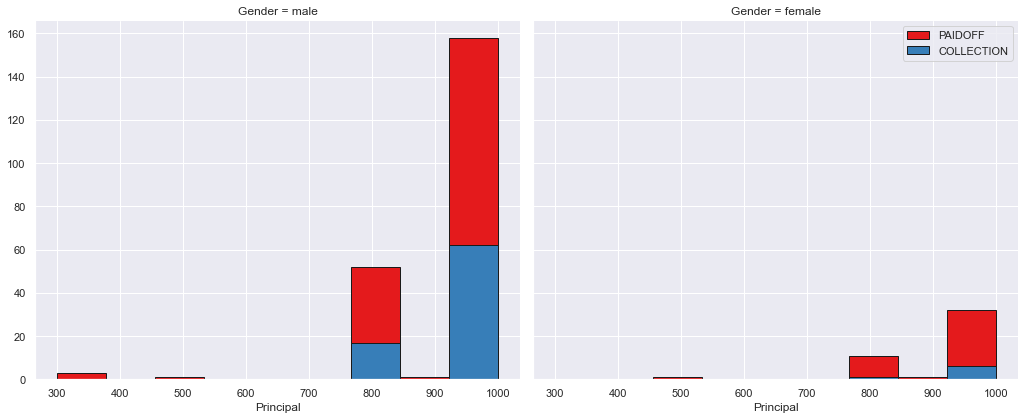

In [150]:
import seaborn as sns

sns.set(rc={'figure.figsize':(15,15)})
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", height=6, aspect=6/5, palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal',  bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

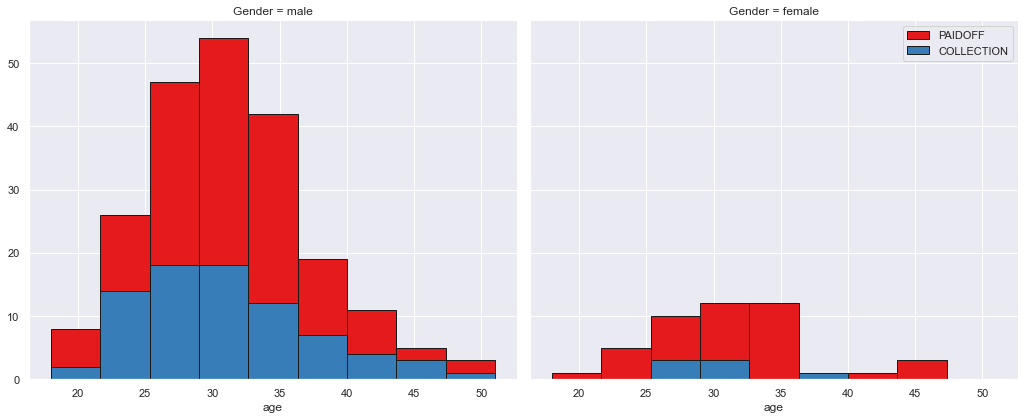

In [151]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", height=6, aspect=6/5, palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


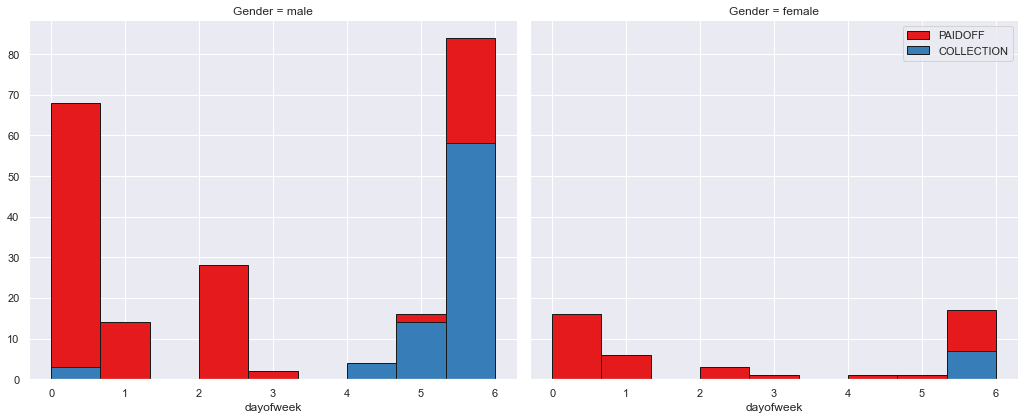

In [152]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", height=6, aspect=6/5, palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [153]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [154]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [155]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [156]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [157]:
df['education'] = df['education'].str.replace("Bechalor","Bachelor")
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bachelor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [158]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bachelor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [159]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bachelor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [160]:
y = df['loan_status'].values
y[0:10]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [161]:
X_ini=X # saving X before scaling global train set

X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [162]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib

<span style="color:#4169E1">  For determining optimal k, we split the dataset: train set 80%, test set 20%.       </span>

In [163]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=5)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # defualt random state 
####X_train= preprocessing.StandardScaler().fit(X_train).transform(X_train)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


<span style="color:#4169E1">  We will test 10 values of k=1:10  </span>

In [164]:
Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat) 
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.65714286, 0.68571429, 0.7       , 0.71428571, 0.7       ,
       0.67142857, 0.68571429, 0.7       , 0.68571429, 0.67142857])

<span style="color:#4169E1">  Plotting average accuracy v. k </span>

In [165]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

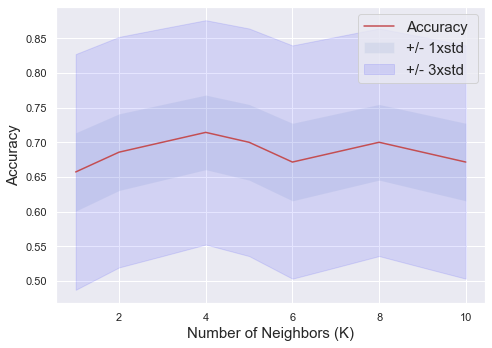

In [166]:
plt.figure(figsize=(7, 5))
plt.plot(range(1,Ks),mean_acc,'r')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="blue")
#---------------------------------
plt.rc('legend',fontsize=15)
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy', fontsize=15 )
plt.xlabel('Number of Neighbors (K)', fontsize=15)
plt.tight_layout()
plt.show()

 <span style="color:#4169E1">  Accuracy is maximum for **k=4**. <br> Sanity check: average accuracy is not necessarily the best indicator. We check other model classification indicators with k=4.  <br>
At first sight, it looks reasonable for both labels </span>

In [167]:
clf = KNeighborsClassifier(n_neighbors = 4).fit(X_train,y_train)
yhat=clf.predict(X_test)
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

  COLLECTION       0.52      0.67      0.58        21
     PAIDOFF       0.84      0.73      0.78        49

    accuracy                           0.71        70
   macro avg       0.68      0.70      0.68        70
weighted avg       0.74      0.71      0.72        70



 <span style="color:#4169E1">  We now train our k=4 model **clf_KNN** with the full training set: X, y </span>

In [168]:
#--- KNN with k=4 ! 
clf_KNN = KNeighborsClassifier(n_neighbors = 4).fit(X,y)
clf_KNN

KNeighborsClassifier(n_neighbors=4)

# Decision Tree


In [169]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [170]:
import graphviz
import pydotplus
import collections

 <span style="color:#4169E1"> We will first create an instance of the DecisionTreeClassifier called **LoanTree**. <br>
Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node. </span>

In [171]:
#LoanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
LoanTree = DecisionTreeClassifier(criterion="entropy", random_state=0)

  <span style="color:#4169E1"> Training the model **LoanTree** with the full training dataset (X,y). </span>

In [172]:
print(LoanTree.fit(X,y))
print(LoanTree.get_depth())

DecisionTreeClassifier(criterion='entropy', random_state=0)
15


<span style="color:#4169E1"> Our model **LoanTree** is trained <br>
The optimal depth returned by the optimization algorithm is 15. <br> 
For post processing the Decision Tree with features names, we transform Feature into a data frame <br> 

In [173]:
DF = pd.DataFrame(Feature)
DF.head()
DF.columns.values

array(['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bachelor',
       'High School or Below', 'college'], dtype=object)

<span style="color:#4169E1"> Plotting the Decision Tree with graphviz </span> 

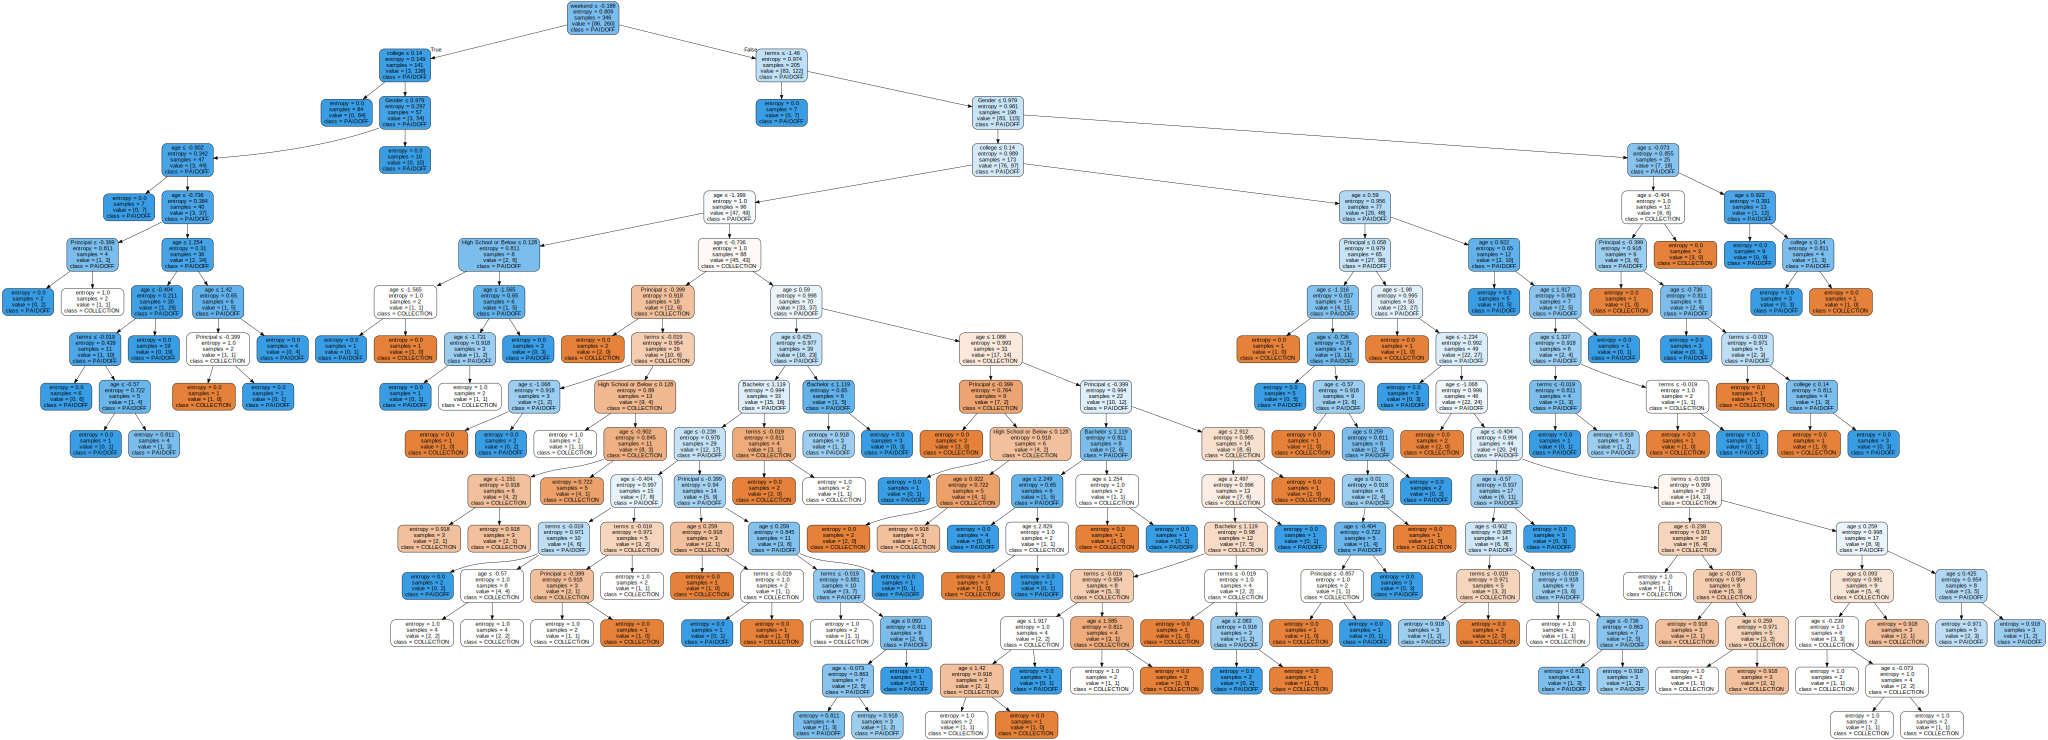

In [174]:
dot_data = tree.export_graphviz(LoanTree, out_file=None, 
                     feature_names=DF.columns,   
                     class_names=LoanTree.classes_,  
                     filled=True, rounded=True,  
                     special_characters=True)  

colors = ('brown', 'forestgreen')
#edges = collections.defaultdict(list)
graph = graphviz.Source(dot_data)  
graph 

<span style="color:#4169E1"> We can't see much. Alternatively, we can print a text version of the decision tree. </span>

In [175]:
list_features = DF.columns.values.tolist()
#print (list_features)
text_representation = tree.export_text(LoanTree, feature_names= list_features )
print(text_representation)

|--- weekend <= -0.19
|   |--- college <= 0.14
|   |   |--- class: PAIDOFF
|   |--- college >  0.14
|   |   |--- Gender <= 0.98
|   |   |   |--- age <= -0.90
|   |   |   |   |--- class: PAIDOFF
|   |   |   |--- age >  -0.90
|   |   |   |   |--- age <= -0.74
|   |   |   |   |   |--- Principal <= -0.40
|   |   |   |   |   |   |--- class: PAIDOFF
|   |   |   |   |   |--- Principal >  -0.40
|   |   |   |   |   |   |--- class: COLLECTION
|   |   |   |   |--- age >  -0.74
|   |   |   |   |   |--- age <= 1.25
|   |   |   |   |   |   |--- age <= -0.40
|   |   |   |   |   |   |   |--- terms <= -0.02
|   |   |   |   |   |   |   |   |--- class: PAIDOFF
|   |   |   |   |   |   |   |--- terms >  -0.02
|   |   |   |   |   |   |   |   |--- age <= -0.57
|   |   |   |   |   |   |   |   |   |--- class: PAIDOFF
|   |   |   |   |   |   |   |   |--- age >  -0.57
|   |   |   |   |   |   |   |   |   |--- class: PAIDOFF
|   |   |   |   |   |   |--- age >  -0.40
|   |   |   |   |   |   |   |--- class: PAIDOFF


# Support Vector Machine


In [176]:
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn import svm

<span style="color:#4169E1">  Initial results with SVM were not satisfying. Particularly 0 accuracy in identifying 'COLLECTION' cases. <br>
There are several Kernels and options. As for the KNN algorithm,  we used the splitted training set to adjust SVM parameters. <br>
Kernel: "RBF" we iterated a few values of C, to improve 'COLLECTION' f1-score. 
</span>

In [177]:
#clf_0 = svm.SVC(kernel='rbf', gamma='scale')  # C=1;
#clf_0 = svm.SVC(C=10, kernel='rbf', gamma='scale')
#clf_0 = svm.SVC(C=100, kernel='rbf', gamma='scale')
clf_0= svm.SVC(C=500, kernel='rbf', gamma='scale')
#clf_0= svm.SVC(C=1000, kernel='rbf', gamma='scale')
#clf_0 = svm.SVC(kernel='sigmoid')
# Train 
clf_0.fit(X_train, y_train)
# Predict
yhat = clf_0.predict(X_test)

In [178]:
#Evaluation
#from sklearn.metrics import f1_score
#f1_score(y_test,yhat, average=None)
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

  COLLECTION       0.43      0.29      0.34        21
     PAIDOFF       0.73      0.84      0.78        49

    accuracy                           0.67        70
   macro avg       0.58      0.56      0.56        70
weighted avg       0.64      0.67      0.65        70



 <span style="color:#4169E1">  C=500 improved accuracy and 'COLLECTION' **f1-score** from 0 to 0.34. <br>
We now train our model **clf_SVM** with the full training set and **C=500**.  </span>

In [179]:
clf_SVM= svm.SVC(C=500, kernel='rbf', gamma='scale')
clf_SVM.fit(X, y) 

SVC(C=500)

# Logistic Regression


In [180]:
from sklearn.linear_model import LogisticRegression

<span style="color:#4169E1">  Initial results with LR were not satisfying. Particularly 0 accuracy in identifying 'COLLECTION' cases. <br>
There are several solvers and options. We used the splitted training set to adjust LR parameters. <br>
Solver: "liblinear". We manually iterated a few values of C, to improve 'COLLECTION' f1-score and weighted accuracy. 
</span>

In [181]:

LR = LogisticRegression(penalty='l1',C=10, solver='liblinear').fit(X_train,y_train)
#LR = LogisticRegression(C=10, solver='liblinear').fit(X_train,y_train)
#LR = LogisticRegression(random_state=1).fit(X_train,y_train)
LR

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [182]:
yhat_LR = LR.predict(X_test)
yhat_LR_prob = LR.predict_proba(X_test)
yhat_LR
print (classification_report(y_test, yhat_LR))

              precision    recall  f1-score   support

  COLLECTION       0.40      0.10      0.15        21
     PAIDOFF       0.71      0.94      0.81        49

    accuracy                           0.69        70
   macro avg       0.55      0.52      0.48        70
weighted avg       0.62      0.69      0.61        70



<span style="color:#4169E1">  It was difficult to get a better 'COLLECTION' f1-score. <br> We now train our model with the full traing set, with C=10. </span>

In [183]:
clf_LR = LogisticRegression(penalty='l1',C=10, solver='liblinear').fit(X,y)
clf_LR

LogisticRegression(C=10, penalty='l1', solver='liblinear')

# Model Evaluation using Test set


In [184]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix


First, download and load the test set:


In [185]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-05-19 17:13:45--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: 'loan_test.csv'

     0K ...                                                   100% 2.83G=0s

2022-05-19 17:13:45 (2.83 GB/s) - 'loan_test.csv' saved [3642/3642]



In [186]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()



,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


### Load Test set for evaluation


In [187]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()
# Modifications 
# Convert to Datatime 
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
bins = np.linspace(test_df.dayofweek.min(), test_df.dayofweek.max(), 10)
#g = sns.FacetGrid(test_df, col="Gender", hue="loan_status", height=6, aspect=6/5, palette="Set1", col_wrap=2)
#g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
#g.axes[-1].legend()
#plt.show()
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['education'] = test_df['education'].str.replace("Bechalor","Bachelor")
test_df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bachelor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bachelor,0,6,1


In [188]:
test_df.groupby(['education'])['loan_status'].value_counts(normalize=True)
test_df['education'] = test_df['education'].str.replace("Bechalor","Bachelor")
test_df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,50,1,Bachelor
1,300,7,35,0,Master or Above
2,1000,30,43,1,High School or Below
3,1000,30,26,0,college
4,800,15,29,0,Bachelor


In [189]:
Feature_test = test_df[['Principal','terms','age','Gender','weekend']]
Feature_test = pd.concat([Feature_test,pd.get_dummies(test_df['education'])], axis=1)
Feature_test.drop(['Master or Above'], axis = 1,inplace=True)
Feature_test.head()

,Principal,terms,age,Gender,weekend,Bachelor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [190]:
#Normalization of test_data
FX_test = preprocessing.StandardScaler().fit(Feature_test).transform(Feature_test)
print(FX_test[0:5])
# labels
Fy_test = test_df['loan_status'].values
print(Fy_test[0:5])
Fy_test.shape

[[ 0.49362588  0.92844966  3.05981865  1.97714211 -1.30384048  2.39791576
  -0.79772404 -0.86135677]
 [-3.56269116 -1.70427745  0.53336288 -0.50578054  0.76696499 -0.41702883
  -0.79772404 -0.86135677]
 [ 0.49362588  0.92844966  1.88080596  1.97714211  0.76696499 -0.41702883
   1.25356634 -0.86135677]
 [ 0.49362588  0.92844966 -0.98251057 -0.50578054  0.76696499 -0.41702883
  -0.79772404  1.16095912]
 [-0.66532184 -0.78854628 -0.47721942 -0.50578054  0.76696499  2.39791576
  -0.79772404 -0.86135677]]
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


(54,)

 <span style="color:#4169E1">  Testing our trained models: **clf_KNN** - **LoanTree** - **clf_SVM** - **clf_LR** with the test dataset FX_test, Fy_test </span>

In [191]:
#--- KNN with k=4 ! 
#--- prediction
yhat_knn= clf_KNN.predict(FX_test)
#---
jac_knn_po= jaccard_score(Fy_test, yhat_knn, pos_label='PAIDOFF')
jac_knn_co= jaccard_score(Fy_test, yhat_knn, pos_label='COLLECTION')
f1_knn_co,f1_knn_po    =  f1_score(Fy_test, yhat_knn, average=None)

cm_knn = confusion_matrix(Fy_test, yhat_knn, labels=clf_KNN.classes_)


#--- Decision tree  
#--- prediction
yhat_tree=  LoanTree.predict(FX_test)
#---
jac_tree_po= jaccard_score(Fy_test, yhat_tree, pos_label='PAIDOFF')
jac_tree_co= jaccard_score(Fy_test, yhat_tree, pos_label='COLLECTION')
f1_tree_co, f1_tree_po    =  f1_score(Fy_test, yhat_tree, average=None)

cm_tree = confusion_matrix(Fy_test, yhat_tree, labels=LoanTree.classes_)

#----  SVM 
#--- prediction
yhat_svm= clf_SVM.predict(FX_test)
jac_svm_po=jaccard_score(Fy_test, yhat_svm, pos_label='PAIDOFF')
jac_svm_co=jaccard_score(Fy_test, yhat_svm, pos_label='COLLECTION')
f1_svm_co, f1_svm_po    =  f1_score(Fy_test, yhat_svm, average=None)

cm_svm = confusion_matrix(Fy_test, yhat_svm, labels=clf_SVM.classes_)

#----  Logistic regression
#--- prediction
yhat_LR= clf_LR.predict(FX_test)
jac_LR_po=jaccard_score(Fy_test, yhat_LR, pos_label='PAIDOFF')
jac_LR_co=jaccard_score(Fy_test, yhat_LR, pos_label='COLLECTION')
f1_LR_co, f1_LR_po    =  f1_score(Fy_test, yhat_LR, average=None)

LR_proba=clf_LR.predict_proba(FX_test)
log_loss_LR=log_loss(Fy_test, LR_proba)

cm_LR = confusion_matrix(Fy_test, yhat_LR, labels=clf_LR.classes_)

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:

 <span style="color:#4169E1">   Displaying the report. <br> First we crate an np.array that will be converted to a Dataframe.   </span>

In [192]:

# np.round does not like 'strings'  --- we replace NA with -1.    
numpy_data_po = np.round(np.array( [[jac_knn_po, f1_knn_po, -1], [jac_tree_po, f1_tree_po, -1  ], [jac_svm_po, f1_svm_po , -1] ,  [jac_LR_po, f1_LR_po ,log_loss_LR] ] ),3)
numpy_data_co = np.round(np.array( [[jac_knn_co, f1_knn_co, -1], [jac_tree_co, f1_tree_co, -1  ], [jac_svm_co, f1_svm_co , -1] ,  [jac_LR_co, f1_LR_co ,log_loss_LR] ] ),3)

df0_po = pd.DataFrame(data=numpy_data_po, index=["KNN", "Decision Tree",'SVM', "Logistic Regression" ], columns=["Jaccard", "f1-score", 'logloss'])
df0_co = pd.DataFrame(data=numpy_data_co, index=["KNN", "Decision Tree",'SVM', "Logistic Regression" ], columns=["Jaccard", "f1-score", 'logloss'])



In [193]:
df0_po.columns.name = 'Algorithm'
df0_co.columns.name = 'Algorithm'

df0_po=df0_po.replace({-1:'NA'})
df0_co=df0_co.replace({-1:'NA'})


In [194]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

<span style="color:#4169E1">  Preparing images of confusion matrices.  <br> </span>         

In [195]:
import seaborn as sn

In [196]:
# Building confusion matrices as images. 
cfm= cm_knn
classes = clf_KNN.classes_
df_cfm = pd.DataFrame(cfm, index = classes, columns = classes)
fig=plt.figure(figsize=(6,5))
plt.ion()
#figure1=sn.heatmap(df_cfm, annot=True, fmt="d", cmap="YlGnBu")
figure1=sn.heatmap(df_cfm, square=True, annot=True, annot_kws={'fontsize':16}, fmt="d", cmap='Blues', cbar=False)
#plt.plot(x, y)
plt.title("KNN", fontsize=14)
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.savefig("figure1.png")
plt.close(fig)

cfm= cm_tree
classes = LoanTree.classes_
df_cfm = pd.DataFrame(cfm, index = classes, columns = classes)
fig=plt.figure(figsize=(6,5))
plt.ion()
figure2=sn.heatmap(df_cfm, square=True, annot=True, annot_kws={'fontsize':16}, fmt="d", cmap='Blues', cbar=False)
#plt.plot(x, y)
plt.title("Decision Tree", fontsize=14)
plt.xlabel("Predictions", fontsize=14)
plt.ylabel("Actuals", fontsize=14)
plt.savefig("figure2.png")
plt.close(fig)

cfm= cm_svm
classes = clf_SVM.classes_
df_cfm = pd.DataFrame(cfm, index = classes, columns = classes)
fig=plt.figure(figsize=(6,5))
plt.ion()
figure3=sn.heatmap(df_cfm, square=True, annot=True, annot_kws={'fontsize':16}, fmt="d", cmap='Blues', cbar=False)
#plt.plot(x, y)
plt.title("SVM", fontsize=14)
plt.xlabel("Predictions", fontsize=14)
plt.ylabel("Actuals", fontsize=14)
plt.savefig("figure3.png")
plt.close(fig)


cfm= cm_LR
classes = clf_LR.classes_
df_cfm = pd.DataFrame(cfm, index = classes, columns = classes)

fig=plt.figure(figsize=(6,5))
plt.ion()
figure4=sn.heatmap(df_cfm, square=True, annot=True, annot_kws={'fontsize':16}, fmt="d", cmap='Blues', cbar=False)
#plt.plot(x, y)
plt.title("Logistic Regression", fontsize=14)
plt.xlabel("Predictions", fontsize=14)
plt.ylabel("Actuals", fontsize=14)
plt.savefig("figure4.png")
plt.close(fig)

<span style="color:#4169E1">  Displaying confusion matrices and accuracy report.  <br> </span>  

(-0.5, 431.5, 359.5, -0.5)

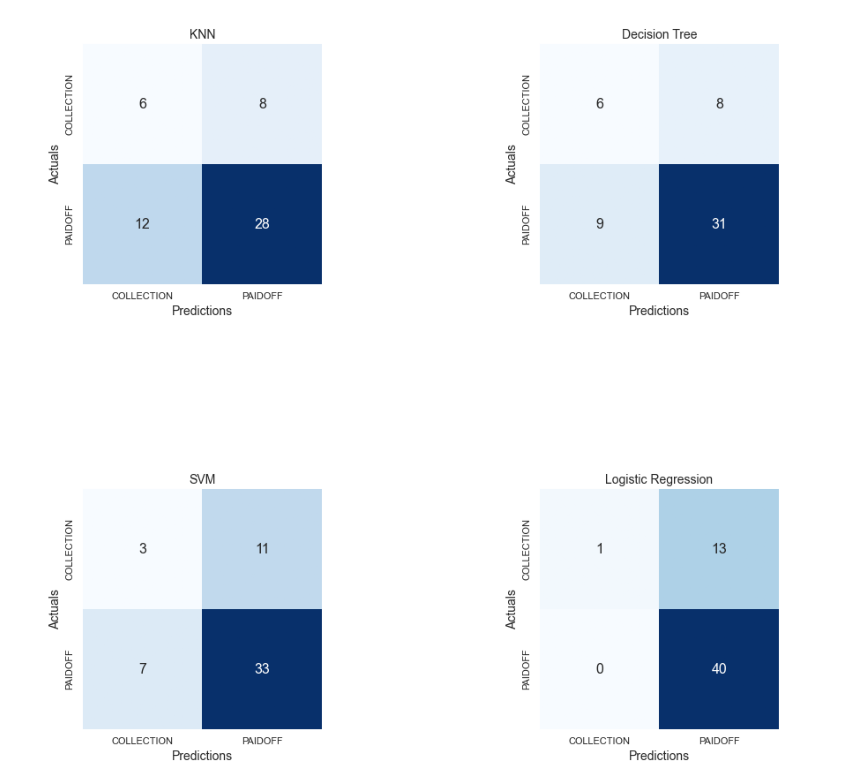

In [197]:
#import cv2
#from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt
import matplotlib.image as mpimg  
# create figure
fig = plt.figure(figsize=(15, 15))
# setting values to rows and column variables
rows = 2
columns = 2 
# reading images
Image1 = mpimg.imread('figure1.png')
Image2 = mpimg.imread('figure2.png')
Image3 = mpimg.imread('figure3.png')
Image4 = mpimg.imread('figure4.png')
#img = mpimg.imread('your_image.png')
#imgplot = plt.imshow(Image1)
#plt.show()
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)  
# showing image
#plt.figure()
plt.imshow(Image1)
plt.axis('off')
#plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
#plt.figure()
plt.imshow(Image2)
plt.axis('off')
#plt.title("Second")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
#plt.figure()
plt.imshow(Image3)
plt.axis('off')
#plt.title("Third")
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
# showing image
#plt.figure()
plt.imshow(Image4)
plt.axis('off')
#plt.title("Fourth")


In [198]:
display_side_by_side([df0_po, df0_co], ['PAIDOFF', 'COLLECTION'])

Algorithm,Jaccard,f1-score,logloss
KNN,0.583000,0.737000,NA
Decision Tree,0.646000,0.785000,NA
SVM,0.647000,0.786000,NA
Logistic Regression,0.755000,0.860000,0.484000
Algorithm,Jaccard,f1-score,logloss
KNN,0.231000,0.375000,NA
Decision Tree,0.261000,0.414000,NA
SVM,0.143000,0.250000,NA
Logistic Regression,0.071000,0.133000,0.484000


# <span style="color:#4169E1"> Conclusions </span>

<span style="color:#4169E1"> Based on accuracy report Tables above, the best results are achieved with the Decision Tree. The algorithm optimized the depth. <br> With KNN, we did our best to optimize parameter **k** and results are not too bad compared with the Decision Tree. <br> Accuracy degrades with SVM and LR which could not predict a single 'Collection' case properly with the test set. <br> In general all algorithms perform poorly to predict 'COLLECTION'. 
* <span style="color:#4169E1"> Datasets used in this Lab are probably too small. There is not sufficient data about 'COLLECTION' and we need to collect more ! </span>  <br>
* <span style="color:#4169E1"> With larger dataset, instead of a simple data split, we could use cross-validation techniques for optimizing parameters of KNN (k), SVM (C), LR (C).  </span>




In [199]:
%reload_ext watermark

# python, ipython, packages, and machine characteristics
#%watermark -v -m -p wget,pandas,numpy,altair
%watermark --iversions
# date
print (" ")
%watermark -u -n -t -z 

numpy     : 1.22.3
sklearn   : 0.0
matplotlib: 3.4.3
pydotplus : 2.0.2
pandas    : 1.3.4
seaborn   : 0.11.2
graphviz  : 0.16
scipy     : 1.7.1

 
Last updated: Thu May 19 2022 17:13:46Eastern Daylight Time



<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
